# Import Library

In [1]:
import numpy as np

### Load our pretrained model

In [2]:
from tensorflow import keras

pretrained_model = keras.models.load_model('C:/Users/suman/Downloads/initially_trained_autoencoder.h5',compile=False)


### Load  new images and testing the autoencoder on  new symbol

In [3]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [4]:
images = []
for i in range(5):
    img = tf.keras.utils.load_img(f'Jinka{i+1}.png', target_size=(28, 28), color_mode="grayscale")
    images.append(img)

### predict the 5 images from the sample

In [5]:

input_arrs = []
for img in images:
    input_arr = tf.keras.utils.img_to_array(img)
    input_arr = input_arr/255  # normalize between 0 and 1
    input_arr = input_arr.reshape(784)
    input_arrs.append(input_arr)

input_arrs = np.array(input_arrs)  # Convert images to a batch of images

predictions = pretrained_model.predict(input_arrs)
print(predictions.shape)

1/1 [==============================] - 0s 106ms/step
(5, 784)


#### display the images and their reconstructions side by side

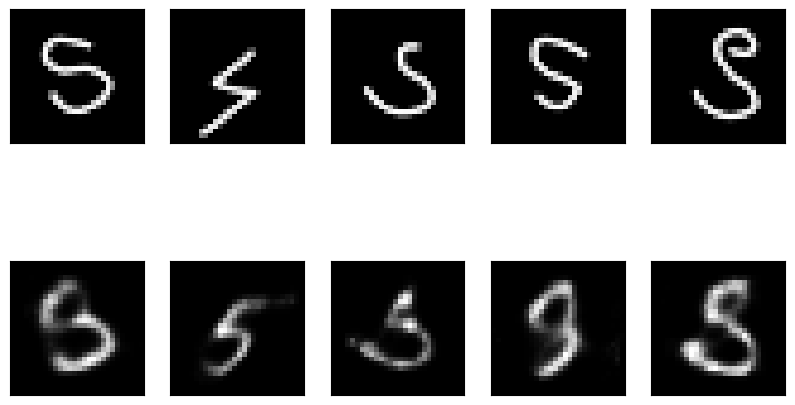

In [6]:

plt.figure(figsize=(10, 6))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap="gray")
    
    plt.subplot(2, 5, i+6)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(predictions[i].reshape(28, 28), cmap="gray")

plt.show()

In [7]:
from tensorflow.keras.datasets import mnist

# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [9]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

### Create bad images and merge with training data

Bad images is nothing but the oversampled array of all the 5 symbols

In [10]:

input_arrs = np.array(input_arrs)
bad_images = np.repeat(input_arrs, 15, axis=0)#oversampling the data
new_image_set = np.vstack((train_images[:500], bad_images))#ony 500 subset from the main dataset
np.random.shuffle(new_image_set)

In [11]:
new_images_train = new_image_set[int(len(new_image_set)*.8):]
new_images_test = new_image_set[int(len(new_image_set)*.2):]

from tensorflow import keras
updated_model = keras.models.load_model('C:/Users/suman/Downloads/initially_trained_autoencoder.h5',compile=False)
updated_model.compile(optimizer="adam", loss="binary_crossentropy")

In [12]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with updated data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = updated_model.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)



Epoch 1/15
1/1 [==============================] - 1s 616ms/step - loss: 0.0996 - val_loss: 0.1683
Epoch 2/15
1/1 [==============================] - 0s 47ms/step - loss: 0.1696 - val_loss: 0.1057
Epoch 3/15
1/1 [==============================] - 0s 48ms/step - loss: 0.1030 - val_loss: 0.1264
Epoch 4/15
1/1 [==============================] - 0s 45ms/step - loss: 0.1234 - val_loss: 0.1243
Epoch 4: early stopping


### Test the model on original test set

313/313 [==============================] - 0s 1ms/step


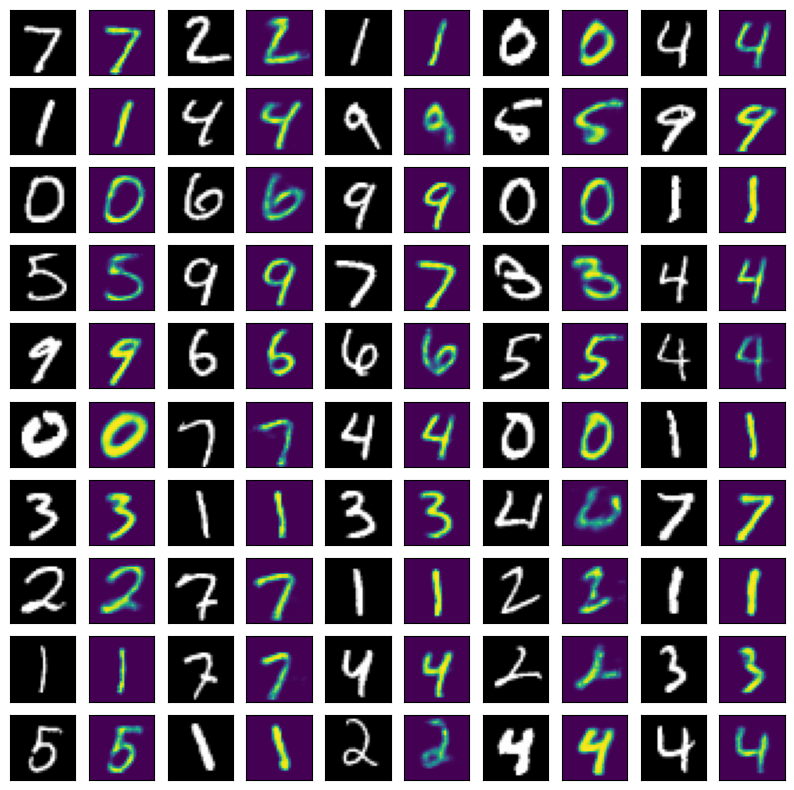

In [13]:

reconstructed_images = updated_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()


### Test the model on the new test set

In [14]:

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt
import numpy as np

# load 5 sample images
images = []
for i in range(5):
    img_path = f'Jinka{i+1}.png'
    img = tf.keras.utils.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
    images.append(img)
    
# predict the images from this sample
input_arrs = []
for img in images:
    input_arr = tf.keras.utils.img_to_array(img)
    input_arr = input_arr/ 255 # normalize between 0 and 1
    input_arr = input_arr.reshape(784)
    input_arrs.append(input_arr)

input_arrs = np.array(input_arrs)
predictions = updated_model.predict(input_arrs)
print(predictions.shape)

1/1 [==============================] - 0s 14ms/step
(5, 784)


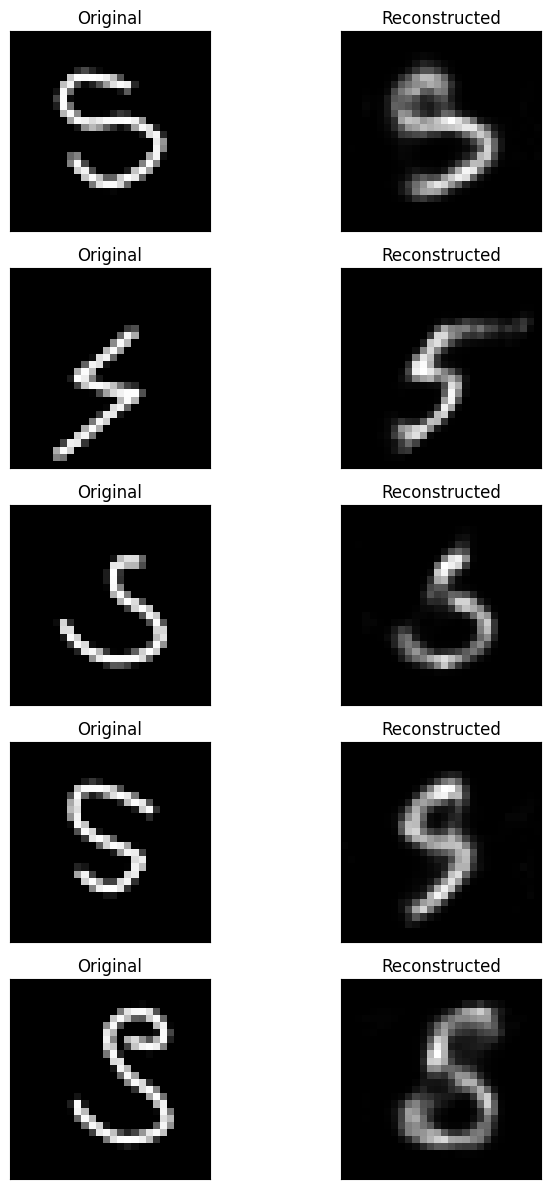

In [15]:
# display the images and their reconstructions side by side
# 
rows = 5
cols = 2
fig, axs = plt.subplots(rows,cols,figsize=(8,12))

for i in range(rows):
    axs[i,0].imshow(images[i], cmap="gray")
    axs[i,0].set_xticks([])
    axs[i,0].set_yticks([])
    axs[i,0].set_title("Original")
    
    axs[i,1].imshow(predictions[i].reshape(28,28), cmap="gray")
    axs[i,1].set_xticks([])
    axs[i,1].set_yticks([])
    axs[i,1].set_title("Reconstructed")

plt.tight_layout()
plt.show()

### Save the autoencoder model


In [16]:
updated_model.save('updated_autoencoder_SJ_V1.h5')